# 0- Import libraries

In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns


# 1- Prepare dataset

# 1.0 Download the dataset

In [ ]:
#https://drive.google.com/file/d/17QOr5vTSZyP45OMD_Bb2MQrkQ4StQUnf/view?usp=sharing
!rm -f salary_data_analist.zip
!gdown 17QOr5vTSZyP45OMD_Bb2MQrkQ4StQUnf
!rm -f salary_data_analist.csv
!unzip salary_data_analist.zip

Downloading...
From: https://drive.google.com/uc?id=17QOr5vTSZyP45OMD_Bb2MQrkQ4StQUnf
To: /content/salary_data_analist.zip
100% 24.0k/24.0k [00:00<00:00, 60.1MB/s]
Archive:  salary_data_analist.zip
  inflating: salary_data_analist.csv  


## 1.1 - Load dataset

In [ ]:
# Define the file path
file_path = './salary_data_analist.csv'

with open(file_path, 'r') as file:
    header_line = file.readline().strip()

# Split the header into column names
column_names = header_line.split(',')

# Create a CsvDataset without specifying data types
salary = tf.data.experimental.CsvDataset(
    file_path,
    record_defaults=[tf.constant("", dtype=tf.string)] * 11,
    header=True,
    field_delim=','
)

# Print dataset information
num_records = 0
for record in salary:
    num_records += 1

print(f"Number of records: {num_records}")
print("Data columns (total {} columns):".format(len(column_names)))

# Print column information
for i, col_name in enumerate(column_names):
    print(f" #{i + 1}   {col_name}   {record[i].dtype}")

Number of records: 3755
Data columns (total 11 columns):
 #1   work_year   <dtype: 'string'>
 #2   experience_level   <dtype: 'string'>
 #3   employment_type   <dtype: 'string'>
 #4   job_title   <dtype: 'string'>
 #5   salary   <dtype: 'string'>
 #6   salary_currency   <dtype: 'string'>
 #7   salary_in_usd   <dtype: 'string'>
 #8   employee_residence   <dtype: 'string'>
 #9   remote_ratio   <dtype: 'string'>
 #10   company_location   <dtype: 'string'>
 #11   company_size   <dtype: 'string'>


## 1.2- Explore the dataset

### 1.2.1 - Show basic information

In [ ]:
# Shuffle the dataset
shuffled_salary = salary.shuffle(buffer_size=10000)  # Adjust buffer_size based on dataset size

# Take a sample of 5 records
sampled_salary = shuffled_salary.take(5)

# Iterate over the sampled dataset
for record in sampled_salary:
    print(record)

(<tf.Tensor: shape=(), dtype=string, numpy=b'2023'>, <tf.Tensor: shape=(), dtype=string, numpy=b'SE'>, <tf.Tensor: shape=(), dtype=string, numpy=b'FT'>, <tf.Tensor: shape=(), dtype=string, numpy=b'Machine Learning Software Engineer'>, <tf.Tensor: shape=(), dtype=string, numpy=b'90000'>, <tf.Tensor: shape=(), dtype=string, numpy=b'USD'>, <tf.Tensor: shape=(), dtype=string, numpy=b'90000'>, <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, <tf.Tensor: shape=(), dtype=string, numpy=b'0'>, <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, <tf.Tensor: shape=(), dtype=string, numpy=b'M'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'2022'>, <tf.Tensor: shape=(), dtype=string, numpy=b'MI'>, <tf.Tensor: shape=(), dtype=string, numpy=b'FT'>, <tf.Tensor: shape=(), dtype=string, numpy=b'Data Engineer'>, <tf.Tensor: shape=(), dtype=string, numpy=b'90000'>, <tf.Tensor: shape=(), dtype=string, numpy=b'USD'>, <tf.Tensor: shape=(), dtype=string, numpy=b'90000'>, <tf.Tensor: shape=(), dtype=string, num

In [ ]:
salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [ ]:
salary.experience_level.value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

<Axes: >

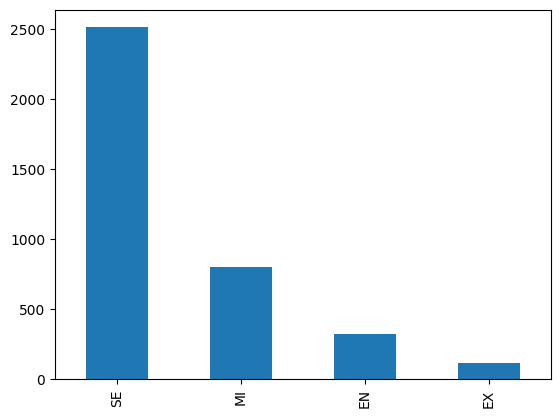

In [ ]:
salary.experience_level.value_counts().plot(kind='bar')

<Axes: >

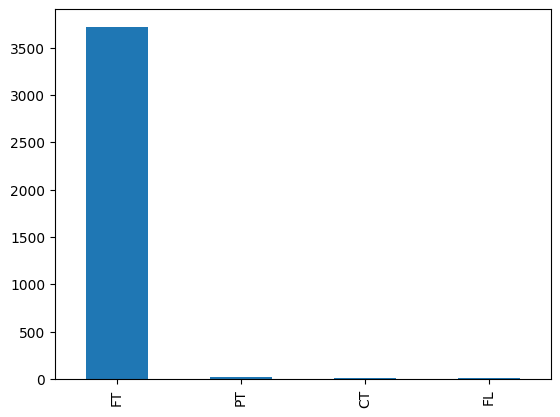

In [ ]:
salary['employment_type'].value_counts().plot(kind='bar')

In [ ]:
salary.job_title.value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

### Sec: comments

The output given above shows that:
1. .....
2. ....


In [ ]:
# Show missing on occupation
salary[salary.job_title == '?']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
salary.remote_ratio.value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

### 1.2.2- Do some basic statistics

In [ ]:
print(salary.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


### 1.2.3- Viz the dataset *** UPDATE TO ADULT DATASET***

#### 1.2.3.1 Boxplot (if need)

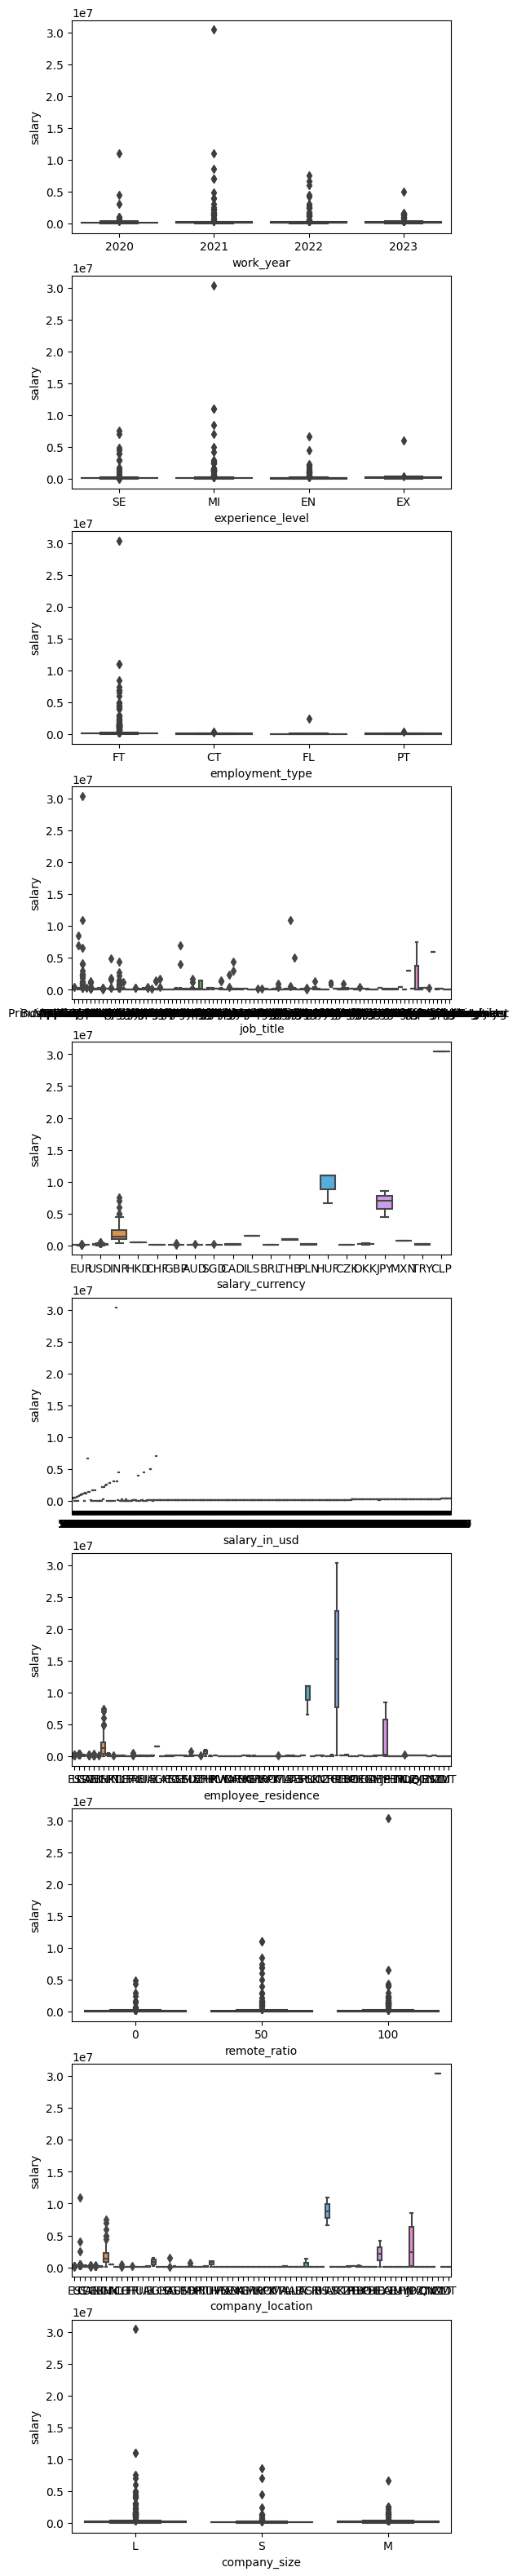

In [ ]:
feature_names = salary.columns[salary.columns != 'salary']
D = len(feature_names)
plt.figure(figsize=(6,D*4))
for idx, col in enumerate(feature_names):
  plt.subplot(D,1,idx+1)
  sns.boxplot(data=salary, x=col, y='salary')
plt.show()

#### 1.2.3.2 Violinplot (if need)

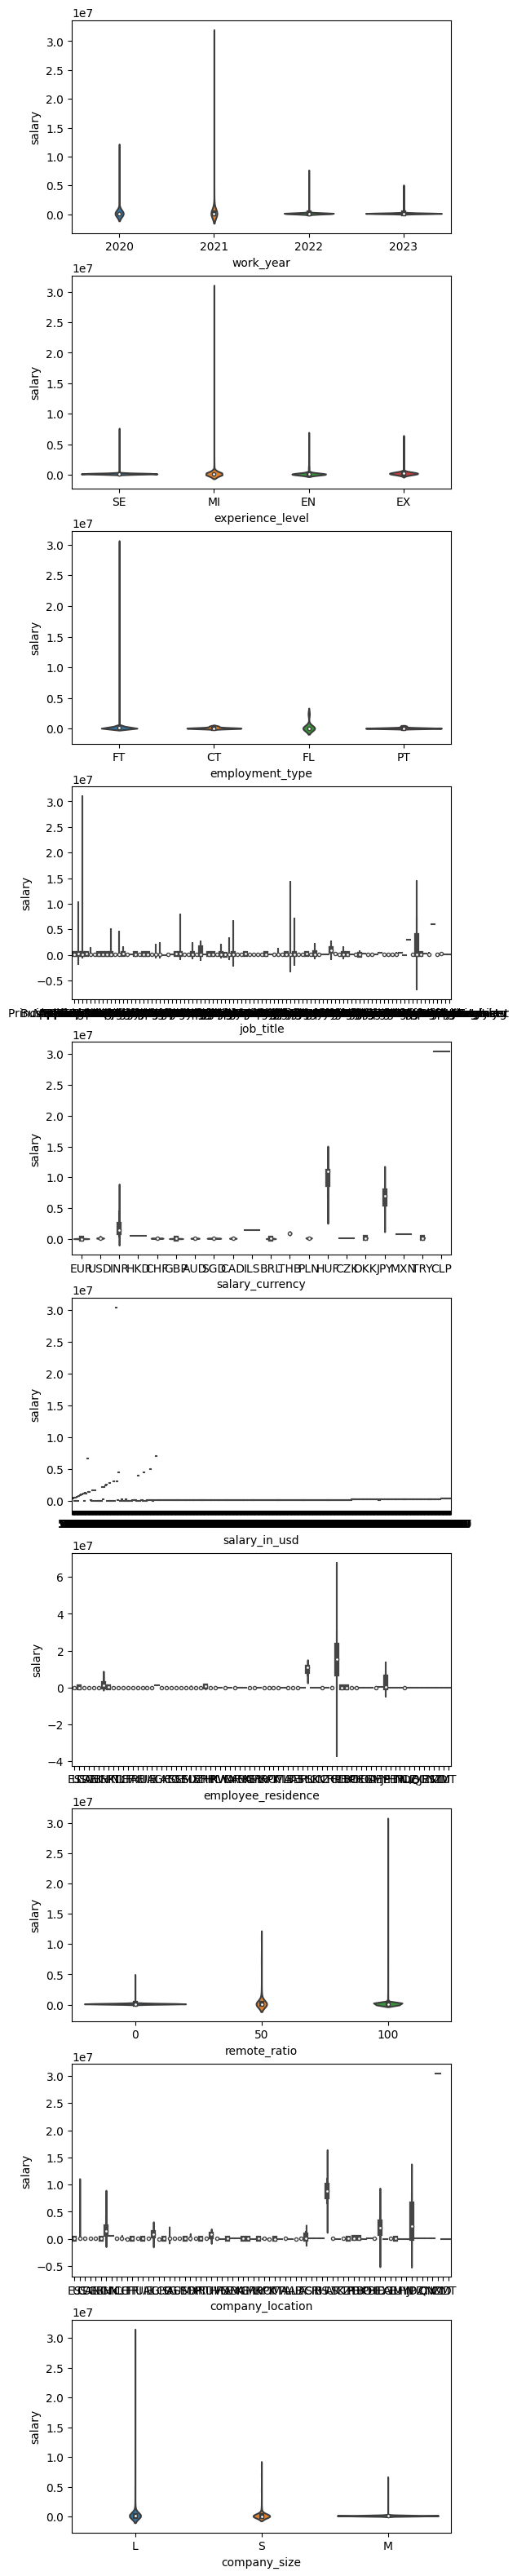

In [ ]:
feature_names = salary.columns[salary.columns != 'salary']
D = len(feature_names)
plt.figure(figsize=(6,D*4))
for idx, col in enumerate(feature_names):
  plt.subplot(D,1,idx+1)
  sns.violinplot(data=salary, x=col, y='salary')
plt.show()

#### 1.2.3.3 Pairplot (if need)

In [ ]:
"""
g = sns.PairGrid(X)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=1, legend=True)
"""

## 1.3 - Data encoding

In [ ]:
# List all columns with object type
obj_cols = list(filter(lambda c: salary[c].dtype=='object', list(salary.columns)))
obj_cols

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [ ]:
wanted_cols = obj_cols

In [ ]:
import sklearn.preprocessing as pre
table = salary.copy()

#Create mapping from colname 2 encoder
encoders = [pre.LabelEncoder()]*len(wanted_cols)
colname2encoder = dict(zip(wanted_cols, encoders))
print(colname2encoder)

"""
# Train the encoders
for colname in colname2encoder.keys():
  colname2encoder[colname].fit(table[colname])
"""

# Transform columns
for colname in colname2encoder.keys():
  table[colname] = colname2encoder[colname].fit_transform(table[colname])

table


{'experience_level': LabelEncoder(), 'employment_type': LabelEncoder(), 'job_title': LabelEncoder(), 'salary_currency': LabelEncoder(), 'employee_residence': LabelEncoder(), 'company_location': LabelEncoder(), 'company_size': LabelEncoder()}


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70,0
3751,2021,2,2,84,151000,19,151000,75,100,70,0
3752,2020,0,2,47,105000,19,105000,75,100,70,2
3753,2020,0,0,17,100000,19,100000,75,100,70,0


In [ ]:
table.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3257,2022,3,2,25,99000,19,99000,75,0,70,1
2548,2022,2,2,4,48000,19,48000,10,100,10,1
3192,2022,1,2,60,6000000,12,76309,39,50,38,0
2306,2022,3,2,33,135000,19,135000,75,0,70,1
1184,2023,3,2,25,110600,19,110600,75,0,70,1
1343,2023,3,2,47,162500,19,162500,75,0,70,1
1030,2023,3,2,25,170500,19,170500,75,100,70,1
537,2023,2,2,33,143865,19,143865,75,0,70,1
1744,2023,0,2,33,160000,19,160000,75,0,70,1
1659,2023,3,2,69,145000,19,145000,75,0,70,1


In [ ]:
salary.job_title.value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [ ]:
table.job_title.value_counts()

33    1040
47     840
25     612
69     289
4      103
      ... 
85       1
10       1
76       1
78       1
56       1
Name: job_title, Length: 93, dtype: int64

In [ ]:
import sklearn.preprocessing as pre
salary.job_title = pre.LabelEncoder().fit_transform(salary.job_title)

In [ ]:
salary.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3415,2022,SE,FT,47,104890,USD,104890,US,100,US,M
2281,2022,SE,FT,45,299500,USD,299500,US,0,US,M
3671,2021,MI,FT,47,52000,EUR,61467,DE,50,AT,M
1858,2022,MI,FT,47,50000,EUR,52533,FR,100,FR,M
3215,2022,MI,FT,33,45000,EUR,47280,ES,100,ES,M
2629,2022,SE,FT,33,129300,USD,129300,US,0,US,M
39,2023,EN,FT,41,100000,USD,100000,NG,100,NG,L
2984,2022,MI,FT,47,110000,EUR,115573,NL,0,NL,M
257,2023,SE,FT,25,70000,USD,70000,US,0,US,M
632,2023,SE,FT,33,129000,USD,129000,US,0,US,M


In [ ]:
y = table['experience_level'].copy()
X = table.drop('experience_level', axis=1)

## 1.4- Split into train/test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (3004, 10)
X_test.shape:  (751, 10)


# 2- Create and train machine learning models

## 2.1 - Import and define funtions

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import PCA


def generate_pipes(pipe_config):
  pipe_config = [list(step.items()) for _, step in pipe_config]
  pipe_config = list(itertools.product(*pipe_config))
  pipe_names = list(map(lambda steps: [name for name,_ in steps], pipe_config))
  pipe_names = list(map(lambda L: ">".join(L), pipe_names))
  pipes = [Pipeline(cfg) for cfg in pipe_config]
  return dict(zip(pipe_names, pipes))

def find_hyperparams(pipe_mapper, max_iterations=10): #, min_accuracy_improvement=0.01
  print("Start the tunning process ...")
  best_pipes = {}
  results = []
  prev_best_score = None

  for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
      print(f"{idx + 1}. Tuning pipe: {pipe_name}")

      # Select parameters related to the current pipeline:
      param_grid = {}
      for step_name in pipe_name.split('>'):
          for param_name in parameters.keys():
              if param_name.startswith(step_name):
                  param_grid[param_name] = parameters[param_name]

      # Create a finder and search for the best parameters
      pipe = pipe_mapper[pipe_name]
      finder = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                            scoring="accuracy", refit=True)

      finder.fit(X_train, y_train)
      print("\t best-params: {:>15s}".format(str(finder.best_params_)))
      print(f"\t best-score (accuracy): {finder.best_score_:15.2f}")
      print()

      # Store best pipe
      best_pipes[pipe_name] = finder.best_estimator_

      # Add results to a dataframe
      rs_item = {"Method": pipe_name, "Accuracy": finder.best_score_}
      for key, value in finder.best_params_.items():
          rs_item[key] = value
      results.append(rs_item)

      # Check stopping criterion
      if idx > 0:
          accuracy_improvement = finder.best_score_ - prev_best_score
          if idx >= max_iterations: # accuracy_improvement < min_accuracy_improvement or
              break

      prev_best_score = finder.best_score_

  print("The tuning is done!")
  tuned_table = pd.DataFrame(results)
  tuned_table.set_index('Method', inplace=True)
  return tuned_table, best_pipes


## 2.2- Define pipeplines

In [ ]:
# Define methods for scaling features
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "StandardScaler": StandardScaler()
}
reducers = {
    'PCA': PCA()
}

# Define methods for classifying samples
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=3000),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

pipe_steps = [
    ('scaler', scalers),
    ('reducers', reducers),
    ('classifier', classifiers)
]

# Define parameters for each method
parameters = {
    "MinMaxScaler__feature_range": [(0, 1), (-1, 1)],
    "StandardScaler__with_mean": [True, False],
    "StandardScaler__with_std": [True, False],
    "SVC__kernel": ['rbf', 'linear'],
    "MLPClassifier__hidden_layer_sizes": [(50,), (100,)],
    "MLPClassifier__activation": ['relu'],
    "DecisionTreeClassifier__criterion": ['entropy'],
    "RandomForestClassifier__n_estimators": [50, 100],
    "RandomForestClassifier__criterion": ['entropy'],
    "PCA__n_components": [0.90, 0.95]
}


## 2.3- Tune hyper-parameters

In [ ]:
pipe_mapper = generate_pipes(pipe_steps)
tuned_table, best_pipes = find_hyperparams(pipe_mapper)

Start the tunning process ...
1. Tuning pipe: MinMaxScaler>PCA>LogisticRegression
	 best-params: {'MinMaxScaler__feature_range': (0, 1), 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.70

2. Tuning pipe: MinMaxScaler>PCA>MLPClassifier
	 best-params: {'MLPClassifier__activation': 'relu', 'MLPClassifier__hidden_layer_sizes': (100,), 'MinMaxScaler__feature_range': (0, 1), 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.72

3. Tuning pipe: MinMaxScaler>PCA>SVC
	 best-params: {'MinMaxScaler__feature_range': (0, 1), 'PCA__n_components': 0.95, 'SVC__kernel': 'rbf'}
	 best-score (accuracy):            0.71

4. Tuning pipe: MinMaxScaler>PCA>DecisionTreeClassifier
	 best-params: {'DecisionTreeClassifier__criterion': 'entropy', 'MinMaxScaler__feature_range': (0, 1), 'PCA__n_components': 0.95}
	 best-score (accuracy):            0.69

5. Tuning pipe: MinMaxScaler>PCA>RandomForestClassifier
	 best-params: {'MinMaxScaler__feature_range': (-1, 1), 'PCA__n_components

In [ ]:
# Save to file
tuned_table.to_csv("tuned_results.csv", sep=";")

In [ ]:
# Best pipeline:
tuned_table[tuned_table["Accuracy"] == tuned_table["Accuracy"].max()].dropna(axis=1)

,Accuracy,PCA__n_components,RandomForestClassifier__criterion,RandomForestClassifier__n_estimators
Method,,,,
MaxAbsScaler>PCA>RandomForestClassifier,0.734354,0.95,entropy,100.0


In [ ]:
# Show the selected pipe
best_pipelines = tuned_table[tuned_table["Accuracy"] == tuned_table["Accuracy"].max()]
selected_pipe_name = best_pipelines.index[0]
print(f"Name of the best pipe: {selected_pipe_name}")
selected_pipe = best_pipes[selected_pipe_name]


Name of the best pipe: MaxAbsScaler>PCA>RandomForestClassifier


# 3- Evaluate and improve the models

In [ ]:
from sklearn.metrics import classification_report

print("Start the evaluation process ...")
y_pred = selected_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("The evaluation is done!")

Start the evaluation process ...
              precision    recall  f1-score   support

           0       0.66      0.43      0.52        67
           1       0.30      0.13      0.18        23
           2       0.46      0.55      0.50       157
           3       0.83      0.83      0.83       504

    accuracy                           0.72       751
   macro avg       0.56      0.49      0.51       751
weighted avg       0.72      0.72      0.71       751

The evaluation is done!


# 4- Deploy the models

## 4.1- Store the best pipeline to file

In [ ]:
import pickle
# save to file
with open('best_pipe.bin', 'wb') as file:
    pickle.dump(selected_pipe, file)

## 4.2- Load and use the pipeline

In [ ]:
with open('best_pipe.bin', 'rb') as file:
    predictor = pickle.load(file)

# Example of using the pipeline
print("Here is an example of using 'predictor'")
y_pred = predictor.predict(X_test)
print(classification_report(y_test, y_pred))
print("Example: done!")

Here is an example of using 'predictor'
              precision    recall  f1-score   support

           0       0.66      0.43      0.52        67
           1       0.30      0.13      0.18        23
           2       0.46      0.55      0.50       157
           3       0.83      0.83      0.83       504

    accuracy                           0.72       751
   macro avg       0.56      0.49      0.51       751
weighted avg       0.72      0.72      0.71       751

Example: done!


## 4.3- Usage of each model

### 4.3.1- Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

# Define a list of classifiers to try
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    KNeighborsClassifier()
]
desired_components = 0.95
# Iterate over classifiers and evaluate performance
for classifier in classifiers:
    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', MaxAbsScaler()),
        ('reducer', PCA(n_components=desired_components)),  # Specify the desired number of components
        ('classifier', classifier)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__}: Accuracy = {accuracy}")
    print(classification_report(y_test, y_pred,zero_division=1),"\n")

RandomForestClassifier: Accuracy = 0.7190412782956058
              precision    recall  f1-score   support

           0       0.65      0.46      0.54        67
           1       0.33      0.17      0.23        23
           2       0.46      0.53      0.49       157
           3       0.82      0.84      0.83       504

    accuracy                           0.72       751
   macro avg       0.57      0.50      0.52       751
weighted avg       0.72      0.72      0.72       751
 

SVC: Accuracy = 0.6830892143808256
              precision    recall  f1-score   support

           0       0.47      0.10      0.17        67
           1       1.00      0.00      0.00        23
           2       0.40      0.31      0.35       157
           3       0.74      0.91      0.82       504

    accuracy                           0.68       751
   macro avg       0.65      0.33      0.33       751
weighted avg       0.65      0.68      0.64       751
 

LogisticRegression: Accuracy = 0.6804

### 4.3.2- Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor  # Use regressor instead of classifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

# Define a list of regressors to try
regressors = [
    RandomForestRegressor(),
    SVR(),
    LinearRegression(),
    KNeighborsRegressor()  # Use regressor instead of classifier
]
desired_components = 0.95

# Iterate over regressors and evaluate performance
for regressor in regressors:
    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', MaxAbsScaler()),
        ('reducer', PCA(n_components=desired_components)),
        ('regressor', regressor)  # Use regressor instead of classifier
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate mean squared error (replace with your desired regression metric)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{regressor.__class__.__name__}: Mean Squared Error = {mse}")

RandomForestRegressor: Mean Squared Error = 0.5811166721934126
SVR: Mean Squared Error = 0.7758630365825411
LinearRegression: Mean Squared Error = 0.7790676500942726
KNeighborsRegressor: Mean Squared Error = 0.674780292942743


Mean Squared Error: 0.674780292942743
Mean Absolute Error: 0.5318242343541945
R-squared: 0.2015358470614893


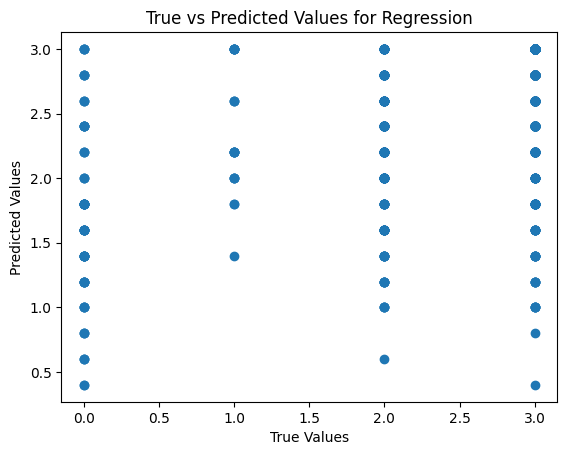

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values for Regression")
plt.show()